# Data Visualization Project: Ford Go Bike 

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [378]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb


%matplotlib inline

# Data Wrangling

In [2]:
# read bike system data
df_bike = pd.read_csv('fordgobike-tripdata.csv')
print(df_bike.shape)
df_bike.head()

(183412, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# check dataframe
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

Issues:
- handle null values for start station columns, member_birth_year, member_gender
- change start time and end time from string to datetime
- change start station id, end station id, and member birth year to integer

In [4]:
# keep the original dataframe
df_cln = df_bike.copy()

In [5]:
# remove null values in start station columns
df_cln = df_cln.dropna(subset=['start_station_id', 'start_station_name'])

In [6]:
# check the proportion of null member info
df_cln[df_cln['member_gender'].isnull() == True].shape[0] / df_cln.shape[0]

0.04510001910323937

In [7]:
# since the proportion of null values for member info is 4.5 
# we can drop rows with null values for now
df_cln = df_cln[df_cln['member_gender'].isnull() == False]

In [8]:
df_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [9]:
# convert start and end time data type to time data type
df_cln['start_time'] = pd.to_datetime(df_cln['start_time'])
df_cln['end_time'] = pd.to_datetime(df_cln['end_time'])

In [10]:
# change float datatype to int
df_cln['start_station_id'] = df_cln['start_station_id'].astype('int')
df_cln['end_station_id'] = df_cln['end_station_id'].astype('int')
df_cln['member_birth_year'] = df_cln['member_birth_year'].astype('int')

In [11]:
df_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int64         
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  int64         
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

# Data Overview

In [12]:
# descriptive statistics for numeric variables
df_cln[['duration_sec','member_birth_year']].describe()

,duration_sec,member_birth_year
count,174952.000000,174952.000000
mean,704.002744,1984.803135
std,1642.204905,10.118731
min,61.000000,1878.000000
25%,323.000000,1980.000000
50%,510.000000,1987.000000
75%,789.000000,1992.000000
max,84548.000000,2001.000000


In [13]:
# quickly check outliers data for duration_sec
print(df_cln[df_cln['duration_sec'] > df_cln.duration_sec.quantile(.85)][['duration_sec']].describe())
print(df_cln[df_cln['duration_sec'] > df_cln.duration_sec.quantile(.85)][['duration_sec']].count())

       duration_sec
count  26182.000000
mean    1983.974257
std     3975.688320
min      991.000000
25%     1109.000000
50%     1301.000000
75%     1735.000000
max    84548.000000
duration_sec    26182
dtype: int64


In [14]:
# quickly check outliers data for member_birth_year
df_cln[df_cln.member_birth_year.between(df_cln.member_birth_year.quantile(.15), df_cln.member_birth_year.quantile(.85))]['member_birth_year'].count()

128228

> too many outliers for birth year

# Univariate Exploration

Let's start our exploration by looking at the main variable of interest: duration_sec. Is the distribution skewed or symmetric? 

### duration sec

Text(0.5, 0, 'duration in second')

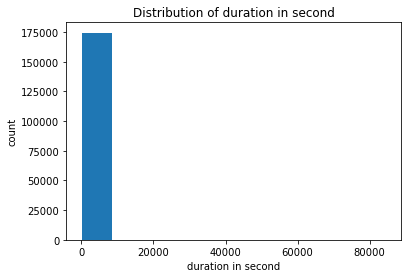

In [204]:
# histogram for duration 
plt.hist(df_cln['duration_sec'])
plt.title('Distribution of duration in second')
plt.ylabel('count')
plt.xlabel('duration in second')

In [16]:
# since the data is skewed, we will check the log distribution
np.log10(df_cln['duration_sec'].describe())

count    5.242919
mean     2.847574
std      3.215427
min      1.785330
25%      2.509203
50%      2.707570
75%      2.897077
max      4.927103
Name: duration_sec, dtype: float64

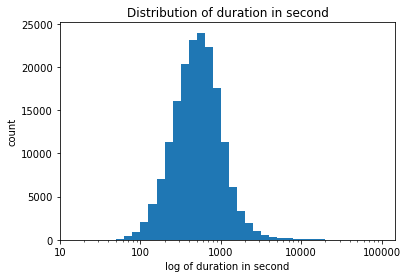

In [205]:
bins = 10 ** np.arange(1.7, 5+0.1, 0.1)
ticks = [10, 100, 1000, 10000, 100000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data=df_cln, x='duration_sec', bins=bins);
plt.xscale('log');
plt.title('Distribution of duration in second')
plt.ylabel('count')
plt.xlabel('log of duration in second')
plt.xticks(ticks, labels);

> - the distribution of duration after we change the scale is normal

### member birth year 
this can represent age

Text(0.5, 0, 'birth year')

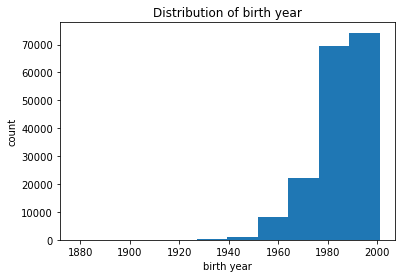

In [213]:
# check the distibution of birth year
plt.hist(df_cln['member_birth_year'])
plt.title('Distribution of birth year')
plt.ylabel('count')
plt.xlabel('birth year')

In [26]:
# separate outliers and non outliers
year_non_outliers = df_cln[df_cln.member_birth_year.between(df_cln.member_birth_year.quantile(.15), df_cln.member_birth_year.quantile(.85))]
year_outliers = df_cln[(df_cln.member_birth_year < df_cln.member_birth_year.quantile(.15)) | (df_cln.member_birth_year > df_cln.member_birth_year.quantile(.85)) ]

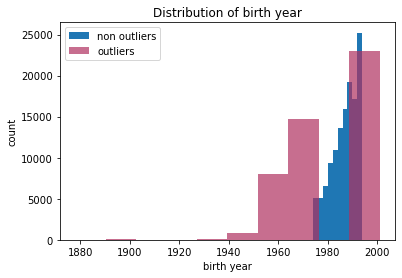

In [211]:
# create histogram to see the distribution of each prediction coefficient column
plt.hist(year_non_outliers['member_birth_year'], label='non outliers', color='#1f77b4')
plt.hist(year_outliers['member_birth_year'], label = 'outliers', alpha=0.7, color='#B03060')

plt.title('Distribution of birth year')
plt.ylabel('count')
plt.xlabel('birth year')
plt.legend()

> - from data wrangling step we know that there are too many outliers
> - several records show that there are people who were born in 1880-ish which is weird
> - however the distribution is negatively skewed

### member gender

Text(0.5, 1.0, 'Proportion of gender')

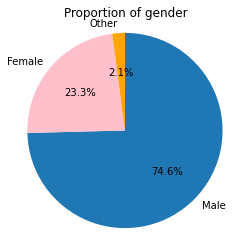

In [214]:
# Calculating the gender 
gender_counts = df_cln['member_gender'].value_counts()

plt.pie(gender_counts, labels = gender_counts.index, startangle = 90, counterclock = False, autopct='%1.1f%%', colors = ['#1f77b4', 'pink', 'orange']);

# We have the used option `Square`. 
# Though, you can use either one specified here - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axis.html?highlight=pyplot%20axis#matplotlib-pyplot-axis
plt.axis('square')
plt.title('Proportion of gender')

> majority of gender from our data is male (74.6%)

### bike share for all trip

Text(0.5, 1.0, 'Proportion of bike sharing')

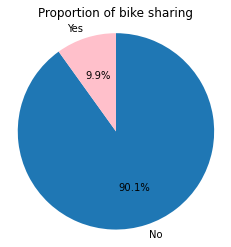

In [215]:
# Calculating the bike share for all trip
share_counts = df_cln['bike_share_for_all_trip'].value_counts()

plt.pie(share_counts, labels = share_counts.index, startangle = 90, counterclock = False, autopct='%1.1f%%', colors = ['#1f77b4', 'pink', 'orange']);

# We have the used option `Square`. 
# Though, you can use either one specified here - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axis.html?highlight=pyplot%20axis#matplotlib-pyplot-axis
plt.axis('square')
plt.title('Proportion of bike sharing')

> majority of users never share bike for all trip (90.1%)

### user type

Text(0.5, 1.0, 'Proportion of user type')

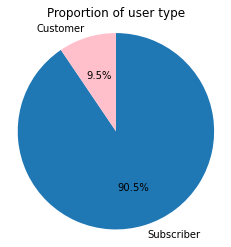

In [216]:
# Calculating the user type
user_type_counts = df_cln['user_type'].value_counts()

plt.pie(user_type_counts, labels = user_type_counts.index, startangle = 90, counterclock = False, autopct='%1.1f%%', colors = ['#1f77b4', 'pink', 'orange']);

# We have the used option `Square`. 
# Though, you can use either one specified here - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axis.html?highlight=pyplot%20axis#matplotlib-pyplot-axis
plt.axis('square')
plt.title('Proportion of user type')

> majority of our users are subscribers (90.5%)

# Bivariate Exploration

### duration and birth year

-0.006041174875254674


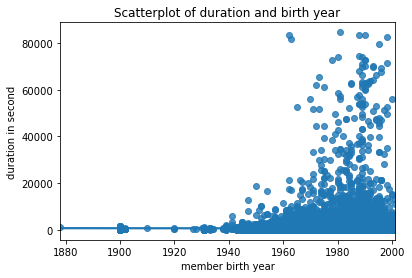

In [217]:
# bivariate plot of duration vs. birth year
sb.regplot(data = df_cln, x = 'member_birth_year', y = 'duration_sec');
plt.title('Scatterplot of duration and birth year')
plt.xlabel('member birth year')
plt.ylabel('duration in second')
print(df_cln['member_birth_year'].corr(df_cln['duration_sec']))

In [49]:
# log function
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

-0.024029148377342147


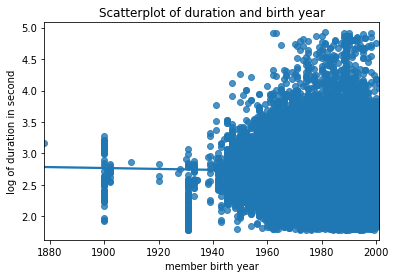

In [218]:
sb.regplot(df_cln['member_birth_year'], df_cln['duration_sec'].apply(log_trans))
plt.title('Scatterplot of duration and birth year')
plt.xlabel('member birth year')
plt.ylabel('log of duration in second')
print(df_cln['member_birth_year'].corr(df_cln['duration_sec'].apply(log_trans)))

> - scatterplot shows that the correlation between birth year and duration is very weak and almost has no correlation
> - but from its coefficient and plot we can see that the correlation tend to be negative, which does make sense
> - we will see if we change duration scale into log

### duration vs. gender, bike share for all trip, user type

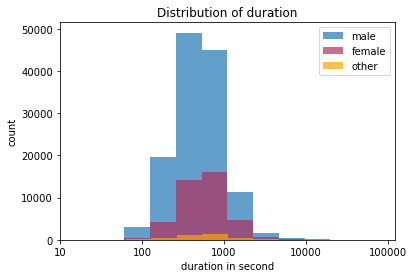

In [75]:
# create histogram to see the distribution of each gender
plt.hist(df_cln[df_cln['member_gender'] == 'Male']['duration_sec'].apply(log_trans), label='male', alpha=0.7, color='#1f77b4')
plt.hist(df_cln[df_cln['member_gender'] == 'Female']['duration_sec'].apply(log_trans), label = 'female', alpha=0.7, color='#B03060')
plt.hist(df_cln[df_cln['member_gender'] == 'Other']['duration_sec'].apply(log_trans), label = 'other', alpha=0.7, color='orange')

tick_locs = [10, 100, 1000, 10000, 100000]
plt.xticks(log_trans(tick_locs), tick_locs);

plt.title('Distribution of duration')
plt.ylabel('count')
plt.xlabel('duration in second')
plt.legend()

> - the distributions of records from each gender are the same

Text(0, 0.5, 'duration in second')

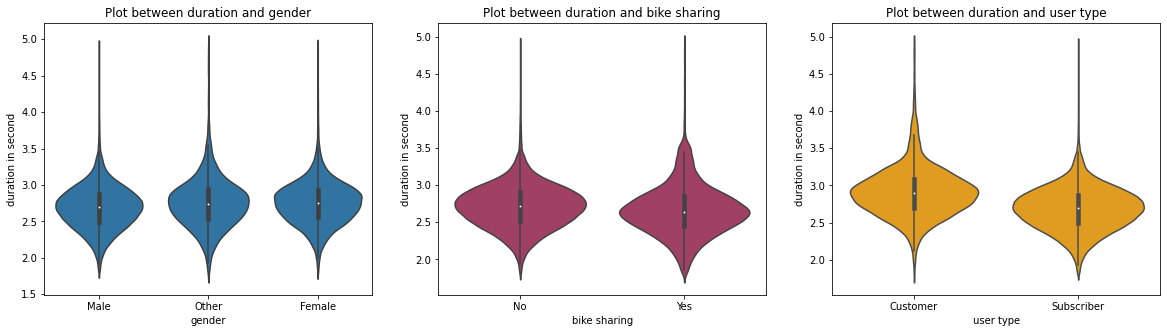

In [237]:
# see the descriptive analysis of duration vs gender, bike share, and user type
plt.figure(figsize = [20, 5])

# bivariate plots of duration vs. gender
plt.subplot(1, 3, 1)
sb.violinplot(data=df_cln, x='member_gender', y=df_cln['duration_sec'].apply(log_trans), color='#1f77b4')
plt.title('Plot between duration and gender')
plt.xlabel('gender')
plt.ylabel('duration in second')

# bivariate plots of duration vs. bike share for all trip
plt.subplot(1, 3, 2)
sb.violinplot(data=df_cln, x='bike_share_for_all_trip', y=df_cln['duration_sec'].apply(log_trans), color='#B03060')
plt.title('Plot between duration and bike sharing')
plt.xlabel('bike sharing')
plt.ylabel('duration in second')

# bivariate plots of duration vs. user type
plt.subplot(1, 3, 3)
sb.violinplot(data=df_cln, x='user_type', y=df_cln['duration_sec'].apply(log_trans), color='orange')
plt.title('Plot between duration and user type')
plt.xlabel('user type')
plt.ylabel('duration in second')

> - there is no major difference of duration between gender if we see from the chart
> - in bike share variable, there is no significant difference as well. but we can we users share the bike, the duration of trip a little bit longer (in general)
> - meanwhile in user type we can see that customers tend to have longer duration of trip compared to subscribers

### birth year vs. gender, bike share for all trip, user type

Text(0, 0.5, 'birth year')

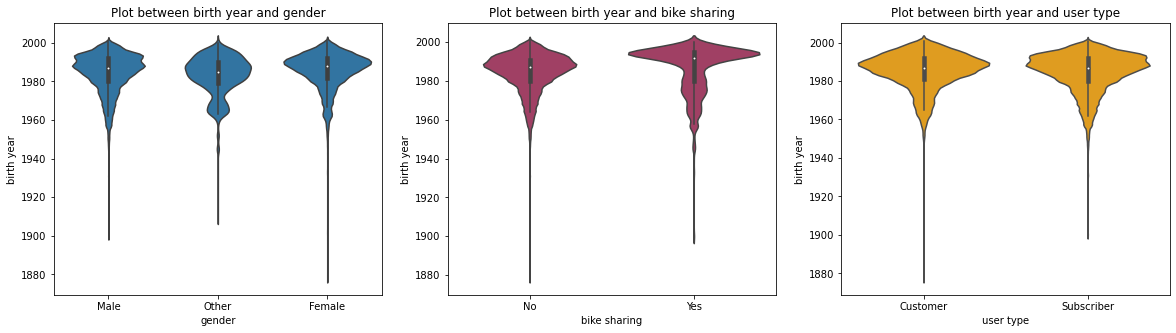

In [238]:
plt.figure(figsize = [20, 5])

# bivariate plots of birth year vs. gender
plt.subplot(1, 3, 1)
sb.violinplot(data=df_cln, x='member_gender', y=df_cln['member_birth_year'], color='#1f77b4')
plt.title('Plot between birth year and gender')
plt.xlabel('gender')
plt.ylabel('birth year')

# bivariate plots of birth year vs. bike share
plt.subplot(1, 3, 2)
sb.violinplot(data=df_cln, x='bike_share_for_all_trip', y=df_cln['member_birth_year'], color='#B03060')
plt.title('Plot between birth year and bike sharing')
plt.xlabel('bike sharing')
plt.ylabel('birth year')

# bivariate plots of birth year vs. user type
plt.subplot(1, 3, 3)
sb.violinplot(data=df_cln, x='user_type', y=df_cln['member_birth_year'], color='orange')
plt.title('Plot between birth year and user type')
plt.xlabel('user type')
plt.ylabel('birth year')

> - there is no significant difference of birth year vs other variables
> - in gender, overall the distribution seems similar
> - in bike share variable, those who share the bike are grouped in moreorless 2000s
> - the same thing happens in user type, the distribution is a bit fatter around 1990s

### gender vs bike share for all trip and user type

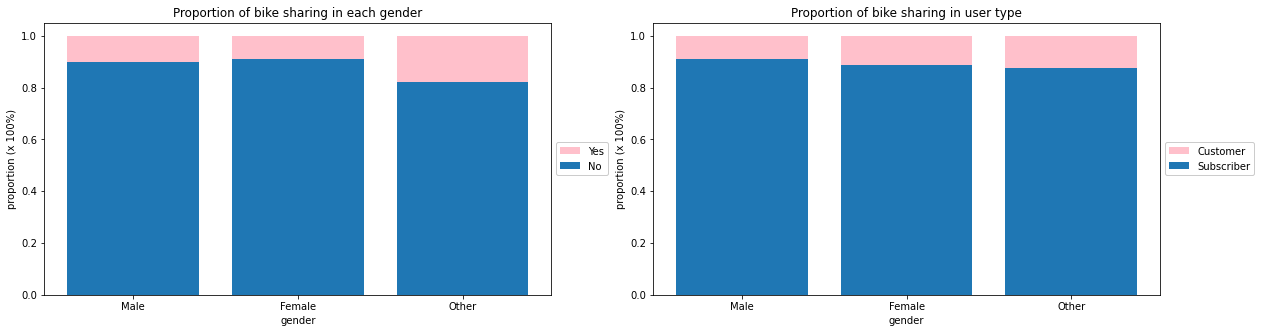

In [222]:
plt.figure(figsize = [20, 5])

######### gender vs bike share
gender = df_cln['member_gender'].value_counts().index
bike_share = df_cln['bike_share_for_all_trip'].value_counts().index
colors = ['#1f77b4','pink','#B03060']

baselines = np.zeros(len(gender))
gender_counts = df_cln['member_gender'].value_counts()

plt.subplot(1, 2, 1)

# for each second-variable category:
artists = [] # for storing references to plot elements

for i in range(len(bike_share)):
    # isolate the counts of the first category,
    b = bike_share[i]
    inner_counts = df_cln[df_cln['bike_share_for_all_trip'] == b]['member_gender'].value_counts()
    inner_props = inner_counts / gender_counts
    
    # then plot those counts on top of the accumulated baseline
    bars = plt.bar(x = np.arange(len(gender)),
                   height = inner_props[gender],
                   bottom = baselines,
                  color = colors[i])
    artists.append(bars)
    baselines += inner_props[gender]

plt.title('Proportion of bike sharing in each gender')
plt.ylabel('proportion (x 100%)')
plt.xlabel('gender')
plt.xticks(np.arange(len(gender)), gender)
plt.legend(reversed(artists), reversed(bike_share), framealpha = 1, bbox_to_anchor = (1, 0.5), loc = 6); 


########### gender vs user type
gender = df_cln['member_gender'].value_counts().index
user = df_cln['user_type'].value_counts().index

baselines = np.zeros(len(gender))
gender_counts = df_cln['member_gender'].value_counts()

plt.subplot(1, 2, 2)

# for each second-variable category:
artists_ut = []

for i in range(len(user)):
    # isolate the counts of the first category,
    u = user[i]
    inner_counts = df_cln[df_cln['user_type'] == u]['member_gender'].value_counts()
    inner_props = inner_counts / gender_counts
    
    # then plot those counts on top of the accumulated baseline
    bars = plt.bar(x = np.arange(len(gender)),
                   height = inner_props[gender],
                   bottom = baselines,
                  color = colors[i])
    artists_ut.append(bars)
    baselines += inner_props[gender]   


plt.title('Proportion of bike sharing in user type')
plt.ylabel('proportion (x 100%)')
plt.xlabel('gender')
plt.xticks(np.arange(len(gender)), gender)
plt.legend(reversed(artists_ut), reversed(user), framealpha = 1, bbox_to_anchor = (1, 0.5), loc = 6);

> - we can't see the difference of behavior between gender and user type. all genders have the same proportion of customers vs subscribers
> - between bike sharing, 20% of users tend to share the bike. there is a difference of behavior between gender and bike sharing

### user type vs bike share for all trip and gender

Text(0.5, 0, 'user type')

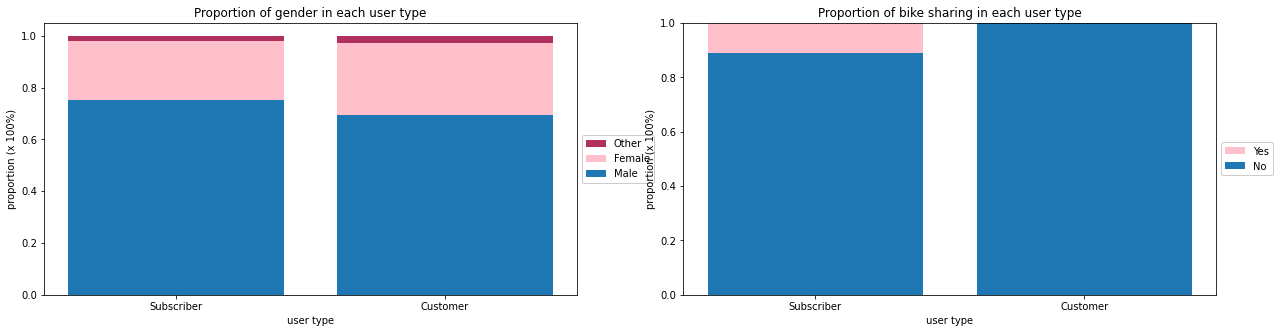

In [224]:
plt.figure(figsize = [20, 5])

############## user type vs gender
# general info
user = df_cln['user_type'].value_counts().index
gender = df_cln['member_gender'].value_counts().index
colors = ['#1f77b4','pink','#B03060']
baselines = np.zeros(len(user))
user_counts = df_cln['user_type'].value_counts()

plt.subplot(1, 2, 1)

# for each second-variable category:
artists_a = [] # for storing references to plot elements

for i in range(len(gender)):
    # isolate the counts of the first category,
    g = gender[i]
    inner_counts = df_cln[df_cln['member_gender'] == g]['user_type'].value_counts()
    inner_props = inner_counts / user_counts
    
    # then plot those counts on top of the accumulated baseline
    bars = plt.bar(x = np.arange(len(user)),
                   height = inner_props[user],
                   bottom = baselines,
                  color = colors[i])
    artists_a.append(bars)
    baselines += inner_props[user]

plt.xticks(np.arange(len(user)), user)
plt.legend(reversed(artists_a), reversed(gender), framealpha = 1, bbox_to_anchor = (1, 0.5), loc = 6); 
plt.title('Proportion of gender in each user type')
plt.ylabel('proportion (x 100%)')
plt.xlabel('user type')


############## user type vs bike share
plt.subplot(1, 2, 2)

# general info
user = df_cln['user_type'].value_counts().index
bike_share = df_cln['bike_share_for_all_trip'].value_counts().index
user_counts = df_cln['user_type'].value_counts()
baselines = np.zeros(len(user))

# for each second-variable category:
artists = [] # for storing references to plot elements

for i in range(len(bike_share)):
    # isolate the counts of the first category,
    g = bike_share[i]
    inner_counts = df_cln[df_cln['bike_share_for_all_trip'] == g]['user_type'].value_counts()
    inner_props = inner_counts / user_counts
    
    # then plot those counts on top of the accumulated baseline
    bars = plt.bar(x = np.arange(len(user)),
                   height = inner_props[user],
                   bottom = baselines,
                  color = colors[i])
    artists.append(bars)
    baselines += inner_props[user]

plt.xticks(np.arange(len(user)), user)
plt.legend(reversed(artists), reversed(bike_share), framealpha = 1, bbox_to_anchor = (1, 0.5), loc = 6); 
plt.title('Proportion of bike sharing in each user type')
plt.ylabel('proportion (x 100%)')
plt.xlabel('user type')

> - the proportion of female in customer type is bit higher than subscribers. there is a subtle difference between user type and gender
> - no customer has shared the bike. maybe bike sharing only possible for subsribers. anyway, there is also a difference between user type and bike sharing

# Multivariate Exploration

> - from previous sections we can gather the attributes that probably have correlation with each other, such as duration, user type, gender, and bike sharing
> - so we only have one numeric varibables and three categorical variables

### duration, gender, user type

Text(0.5, 0, 'user type')

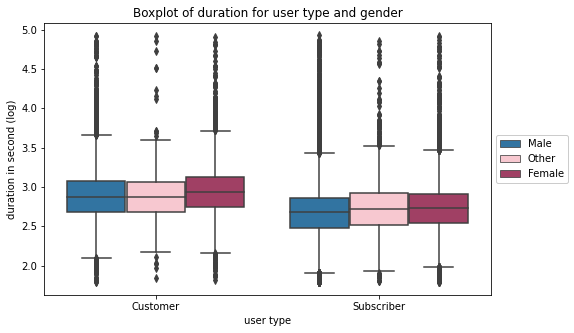

In [319]:
plt.figure(figsize = [8, 5])
colors = ['#1f77b4','pink','#B03060']
sb.boxplot(data = df_cln, x = 'user_type', y = df_cln['duration_sec'].apply(log_trans), hue = 'member_gender', palette=colors)
plt.legend(framealpha = 1, bbox_to_anchor = (1, 0.5), loc = 6); 
plt.title('Boxplot of duration for user type and gender')
plt.ylabel('duration in second (log)')
plt.xlabel('user type')

# Data Analysis

There are 3 things that will be polished 
> - How is the difference of trip length between user type?
> - How is the proportion of bike sharing during trip between user type?
> - How is the difference behavior of trip length duration between user type and gender?

### How is the difference of trip length between user type?

Text(0, 0.5, 'duration in second (log)')

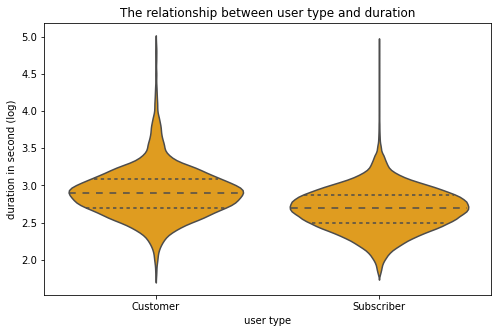

In [342]:
# bivariate plots of duration vs. user type
plt.figure(figsize = [8, 5])
sb.violinplot(data=df_cln, x='user_type', y=df_cln['duration_sec'].apply(log_trans), color='orange', inner='quartile')
plt.title('The relationship between user type and duration')
plt.xlabel('user type')
plt.ylabel('duration in second (log)')

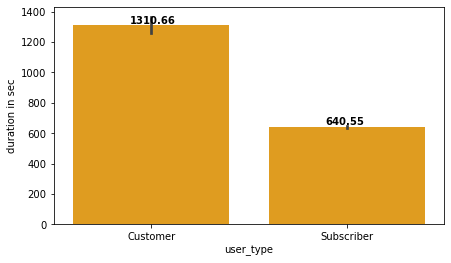

In [364]:
fig,ax = plt.subplots(figsize=(7,4))
sb.barplot(data=df_cln, x='user_type', y='duration_sec', color='orange')
plt.ylabel('duration in sec')

for rect in reversed(ax.patches):
    ax.text((rect.get_x() + rect.get_width() / 2)-0.11, rect.get_height() ,"%.2f"% rect.get_height(), va="bottom", c='black', fontweight='bold')

> - There are two types of users: Customers and Subscribers
> - Customers spend longer duration of trip. On average, customers spend 1311 seconds or around 22 minutes meanwhile, subscribers spend 640 seconds or 11 minutes
> - This leads to assumption whether subscribers are willing to subscribe because they should go to nerby places recurringly? Since we don't have user_id, we can't dig more

### How is the proportion of bike sharing during trip between user type?

posx and posy should be finite values
posx and posy should be finite values


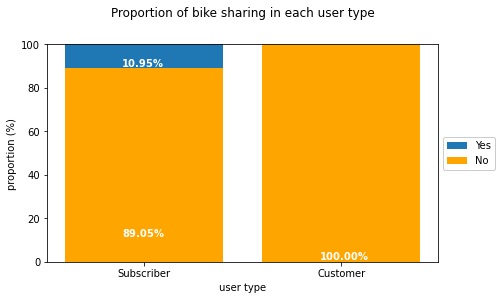

In [349]:
colors = ['orange','#1f77b4','pink','#B03060','#68C2A6','#8CA1CC','#FA8C61']
fig,ax = plt.subplots(figsize=(7,4))

# general info
user = df_cln['user_type'].value_counts().index
bike_share = df_cln['bike_share_for_all_trip'].value_counts().index
user_counts = df_cln['user_type'].value_counts()
baselines = np.zeros(len(bike_share))

# for each second-variable category:
artists = [] # for storing references to plot elements

for i in range(len(bike_share)):
    # isolate the counts of the first category,
    g = bike_share[i]
    inner_counts = df_cln[df_cln['bike_share_for_all_trip'] == g]['user_type'].value_counts()
    inner_props = (inner_counts / user_counts) * 100
    
    # then plot those counts on top of the accumulated baseline
    bars = plt.bar(x = np.arange(len(user)),
                   bottom = baselines,
                   height = inner_props[user],
                  color = colors[i])
    artists.append(bars)
    baselines += inner_props[user]
    
plt.xticks(np.arange(len(user)), user)
plt.legend(reversed(artists), reversed(bike_share), framealpha = 1, bbox_to_anchor = (1, 0.5), loc = 6); 
plt.title('Proportion of bike sharing in each user type', y=1.1)
plt.ylabel('proportion (%)')
plt.xlabel('user type')

for rect in reversed(ax.patches):
    ax.text((rect.get_x() + rect.get_width() / 2)-0.11, (100-rect.get_height()) ,"%.2f%%"% rect.get_height(), va="bottom", c='white', fontweight='bold')

> - We got information that there is no customer who shares the bike during the trip
> - This also leads to the assumption, customers probably are not allowed to share the bike

### How is the difference behavior of trip length duration between user type and gender?

Text(0.5, 0, 'user type')

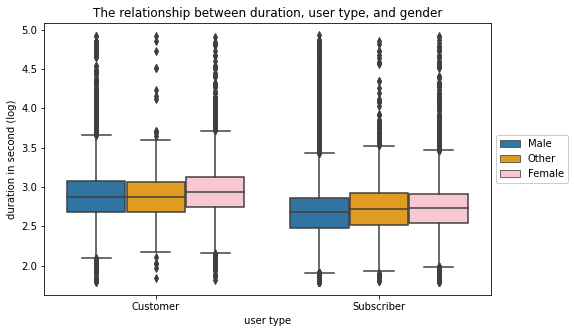

In [351]:
plt.figure(figsize = [8, 5])
colors = ['#1f77b4','orange','pink','#B03060']
sb.boxplot(data = df_cln, x = 'user_type', y = df_cln['duration_sec'].apply(log_trans), hue = 'member_gender', palette=colors)
plt.legend(framealpha = 1, bbox_to_anchor = (1, 0.5), loc = 6); 
plt.title('The relationship between duration, user type, and gender')
plt.ylabel('duration in second (log)')
plt.xlabel('user type')

> - We have assumed from other finding that customers took a bit longer on their trip
> - Subscribers' minimum duration is lower than customers' minimum duration, but their maximum duration is also lower than customers' maximum duration
> - Female customers significantly have a longer duration of trip compared to Male customers

# Conclusion

> - Customers spend longer duration of trip. On average, customers spend 1311 seconds or around 22 minutes meanwhile, subscribers spend 640 seconds or 11 minutes
> - There is no customer who shares the bike during the trip. Customers probably are not allowed to share the bike
> - Female customers significantly have a longer duration of trip compared to Male customers

# Resources and Limitation

> - Udacity resources and knowledge forum
> - Confusion on defining business questions since we need to explore the univariate, bivariate, and multivariate things first 